<center><img src='./imagenes/TecLogo.png'></center>

# <center>Semana 4 - Actividad 1 - PCA</center>
## <center>CIENCIA Y ANALITICA DE DATOS</center>
## <center>EQUIPO 12</center>
## <center>Guillermo Alfonso Muñiz Hermosillo - A01793101</center>
## <center>José Ramiro Adán Charles - A00174646</center>
## <center><a href='https://github.com/PosgradoMNA/actividades-del-projecto-cad_equipo_12/tree/main/Semana4-Actividad1'>GITHUB LINK</a></center>


In [1]:
# Importamos Numpy y Pandas.
import pandas as pd
import numpy as np

# Agregamos certificatos SSL para correr en MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Definimos el path de donde extraeremos los datos
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [3]:
# Extraemos los datos y los guardamos en un DataFrame
df = pd.read_csv(path, index_col = 0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Pre-Procesamiento de datos

Para hacer mas util nuestro analisis, lo primero que hicimos fue el procesamiento de los datos como en el ejercicio pasado. 

Lo primero que realizaremos sera poner un nombre a las columnas del conjunto de datos

In [4]:
newColumnNames = ['Total_Credito', 'Sexo', 'Estudios', 'Estado_Civil', 'Edad', 'PPSep2005','PPAgo2005','PPJul2005','PPJun2005','PPMay2005','PPAbr2005', 'TRSep2005', 'TRAgo2005','TRJul2005','TRJun2005','TRMay2005','TRAbr2005', 'TPPSep2005','TPPAgo2005','TPPJul2005','TPPJun2005','TPPMay2005','TPPAbr2005', 'Y']
# PP = Pagos Pasados
# TR = Total del Recibo
# TPP = Total de Pagos Pasados
df.columns = newColumnNames # Remplazamos los nombres de las columnas
df.head()

,Total_Credito,Sexo,Estudios,Estado_Civil,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,PPMay2005,...,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Ahora bien, para PCA necesitamos trabajar solo con variables continuas es decir aquellas en las que se cuantifica algo. Para este conjunto de datos estariamos hablando de:

- Total_Credito
- Edad
- Total del Recibo
- Total de Pagos Pasados

Asi mismo estaremos eliminando la variable predictora Y, ya que esta no es parte del analisis sino mas bien el resultado de este
Por lo que crearemos un nuevo dataframe con estos datos.

In [5]:
ndf = df.copy().drop(['Sexo', 'Estudios', 'Estado_Civil', 'PPSep2005','PPAgo2005','PPJul2005','PPJun2005','PPMay2005','PPAbr2005', 'Y'], axis=1)
ndf.head()

,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Ahora bien, necesitamos analizar y limpiar nuestro conjunto de datos para eliminar valores nulos. Usaremos el mismo metodo que en la actividad anterior, creando un dataframe que nos indique el numero de valores nulos por cada columna.

In [6]:
datosNulos = ndf.isnull() # creamos un df con los valores nulos en nuestro conjunto de datos
rows = []
for columna in datosNulos.columns.values.tolist(): # Iteramos Por cada uno de estos valores nulos
    rows.append({ # En nuestra lista, adjuntamos la columna, el numero de registros no vacios (True), el numero de registros nulos (False)
        'ColumnName':columna, 
        'True': datosNulos[columna].value_counts().values[0],
        'False': datosNulos[columna].value_counts().values[1] if len(datosNulos[columna].value_counts().values) > 1 else 0
    })
nulldf = pd.DataFrame(rows)    
nulldf

,ColumnName,True,False
0,Total_Credito,30000,0
1,Edad,29995,5
2,TRSep2005,29989,11
3,TRAgo2005,29989,11
4,TRJul2005,29987,13
5,TRJun2005,29985,15
6,TRMay2005,29983,17
7,TRAbr2005,29990,10
8,TPPSep2005,29992,8
9,TPPAgo2005,29991,9


Como podemos observar hay multiples valores nulos en las columnas, por lo que no creimos conveniente eliminarlas. Por lo que procederemos a transformar estos datos de la siguiente manera:

- Edad: Utilizaremos la media de la edad.
- Total del Recibo: Utilizaremos la mediana ya que es una variable que puede ser muy grande o muy pequeña dependiente del cliente.
- Total de Pagos Pasados: Mismo caso que Total del Recibo, se utilizara la mediana.

### EDAD

In [7]:
# Calculamos la Media de la edad en nuestro dataframe
edadmedia = int(ndf.Edad.mean())
print('La Media es: ', edadmedia)

La Media es:  35


In [8]:
# Remplazamos la Edad en los 5 registros por la media de las edades
ndf.Edad.fillna(edadmedia, inplace=True)

In [9]:
# Verificamos que los cambios se hayan efectuado.
print("HAY VALORES NULOS EN EDAD?: ", ndf.Edad.isnull().values.any())

HAY VALORES NULOS EN EDAD?:  False


### TOTAL DEL RECIBO Y TOTAL PAGOS PASADOS

In [10]:
# Verificamos antes de limpiar que si hay valores vacios
print("HAY VALORES NULOS EN Total del Recibo y Total de Pagos Pasados: ", ndf.iloc[:, 2:14].isnull().values.any()) 

HAY VALORES NULOS EN Total del Recibo y Total de Pagos Pasados:  True


In [11]:
# Construimos un DataFrame para mostrar las diferentes medianas
medianaxcol = pd.DataFrame({
    'ColumnName':ndf.iloc[:, 2:14].columns.values, 
    'Mediana': ndf.iloc[:, 2:14].median().values,
})
medianaxcol

,ColumnName,Mediana
0,TRSep2005,22387.0
1,TRAgo2005,21207.0
2,TRJul2005,20089.0
3,TRJun2005,19052.0
4,TRMay2005,18107.0
5,TRAbr2005,17081.0
6,TPPSep2005,2100.0
7,TPPAgo2005,2009.0
8,TPPJul2005,1800.0
9,TPPJun2005,1500.0


In [12]:
# Remplazamos con la mediana en todos los registros de todas las columnas
columnas = medianaxcol.ColumnName.to_list() # Creamos una lista con las columnas
mediana = medianaxcol.Mediana # Creamos una Lista con las medianas

for idx, columna in enumerate(columnas): # Iteramos por cada columna y remplazamos los valores nulos con los valores de la mediana adecuada
    ndf[columna].fillna(mediana[idx], inplace=True)


In [13]:
# Verificamos que los cambios se hayan efectuado.
print("HAY VALORES NULOS EN Total del Recibo y Total de Pagos Pasados: ", ndf.iloc[:, 2:14].isnull().values.any()) 

HAY VALORES NULOS EN Total del Recibo y Total de Pagos Pasados:  False


# PARTE 1: EJERCICIO GUIADO
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Nuestro primer paso es buscar la correlacion entre todas las variables de nuestro conjunto de datos, para identificar aquellas que estan mas fuertemente relacionadas, ya sea positiva o negativamente.

Para esto, usaremos un mapa de calor entre la correlacion de las variables.

<AxesSubplot: >

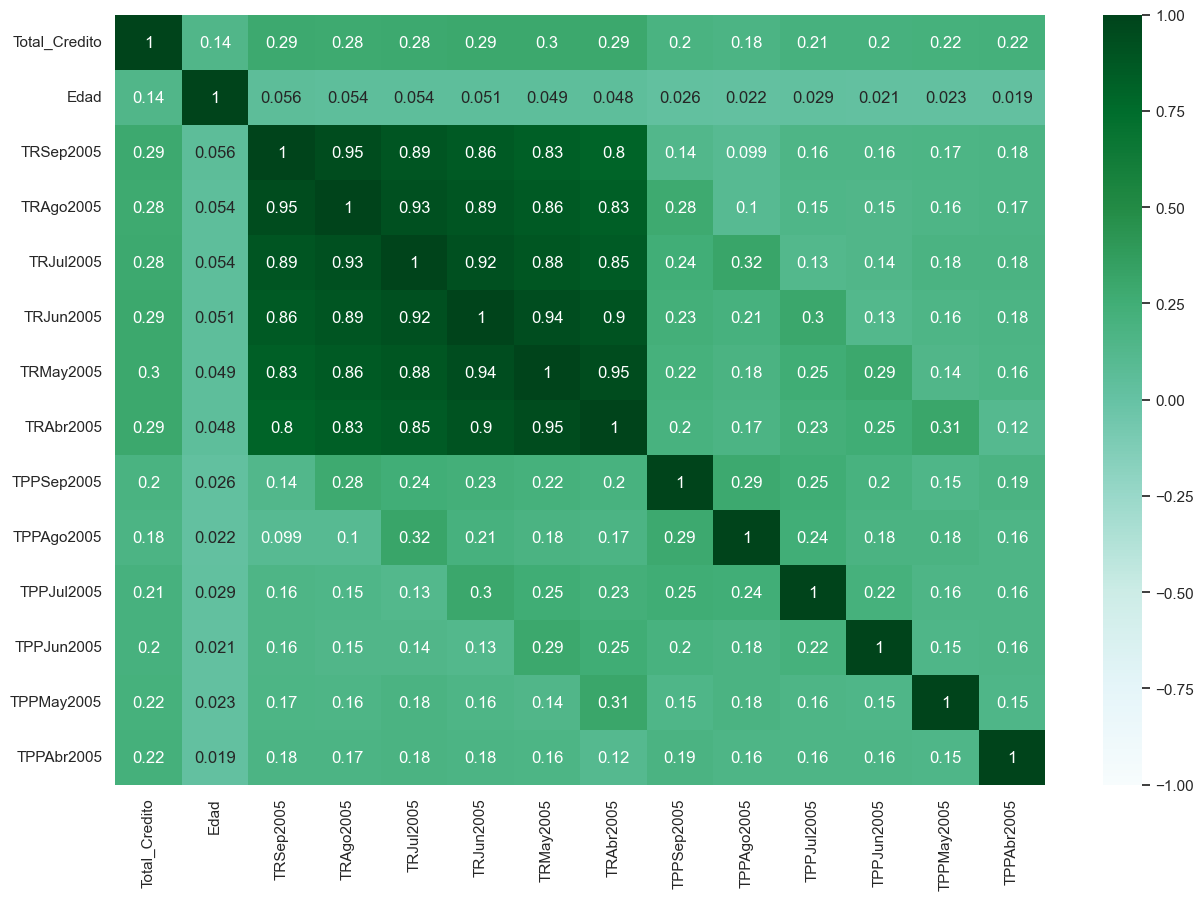

In [14]:
import seaborn as sns # Importamos la libreria seaborn para graficar heatmaps

correlaciones = ndf.corr()

sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(correlaciones, vmin = -1, vmax=1, cmap="BuGn", annot=True)

De esta manera, visualmente podemos observar:
- Las columnas positivamente relacionadas son aquellas con un color verde obscuro. Mientras mas obscuro es el color verde, mas correlacionadas se encuentran. En nuestro conjunto de datos, podemos observar que las variables de Total del Recibo estan todas ellas correlacionadas fuertemente. Adicionalmente la edad  y el total de credito entre 25 y 50% de correlacion con estas variables respectivamente,  por lo que vamos a incluirlas en nuestro analisis
- Las columnas negativamente relacionadas tienen el color verde mas claro, para nuestro dataframe parece no haber correlaciones negativas.

Entonces procederemos al analisis de estas correlaciones. Comenzaremos analizando la fuerte correlacion de las columnas del total de recibo.

In [15]:
columnas = ['Total_Credito','Edad','TRSep2005', 'TRAgo2005','TRJul2005','TRJun2005','TRMay2005','TRAbr2005'] # Definimos que columnas queremos analizar

summary = {
    "Varianzas: ": ndf[columnas].var().round(2),
    "Valor Min: ": ndf[columnas].min().round(2),
    "valor Max: ": ndf[columnas].max().round(2)
}
pd.DataFrame(summary, index = columnas).transpose()

,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005
Varianzas:,1.683446e+10,84.96,5.421935e+09,5.065503e+09,4.809159e+09,4.138566e+09,3.696038e+09,3.546526e+09
Valor Min:,1.000000e+04,21.00,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05
valor Max:,1.000000e+06,79.00,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05


De la tabla anterior, podemos observar como los datos estan distribuidos entre las variables del Total_credito, total del recibo y Edad. La magnitud de las variables parece ser la misma (USD) para las columnas Total_Credito y TotalRecibo, no asi para la EDAD la cual es un numero muy pequeño a comparacion. Para comprobar esto buscaremos el % total de las varianzas de estas variables

In [16]:
#Varianza total de todas las variables
varianzaTotal = ndf.var().sum()

#Calculamos la varianza para cada variable que estamos estudiando = df_num.calories.var()
varVarianzas = []
for i, col in enumerate(columnas):
    varVarianzas.append({
        'Columna': col,
        'Varianza': ndf[col].var()
    })
    

#Porcentaje que representa la varianza de cada variable respecto al total.
print('Varianza Total: \t', varianzaTotal.round(2) )

sumaPorcentajes = 0
for var in varVarianzas:
    sumaPorcentajes += ((var['Varianza']/varianzaTotal)*100).round(2)
    print('Varianza ' + var['Columna'] + ': \t' ,  ((var['Varianza']/varianzaTotal)*100).round(2),'%' )
    
print('Porcentaje de Varianza de Variables en Analisis: ', sumaPorcentajes)

Varianza Total: 	 45422224722.84
Varianza Total_Credito: 	 37.06 %
Varianza Edad: 	 0.0 %
Varianza TRSep2005: 	 11.94 %
Varianza TRAgo2005: 	 11.15 %
Varianza TRJul2005: 	 10.59 %
Varianza TRJun2005: 	 9.11 %
Varianza TRMay2005: 	 8.14 %
Varianza TRAbr2005: 	 7.81 %
Porcentaje de Varianza de Variables en Analisis:  95.8


Podemos observar, que debido a la diferencia de unidades entre EDAD y el resto, parece que la Edad no afecta en los resultados del Total del Recibo. Pero como sabemos por nuestro mapa de calor, si existe una correlacion considerable (alrededor del 50%).

Para poder obtener mejores valores, necesitamos escalar nuestras variables. Lo haremos usando la clase StandardScaler. Que transformara los datos de Total del Recibo y Edad para que esten a una escala similar.



In [17]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)

scaleddf = pd.DataFrame(scaled, columns=ndf.columns)
scaleddf.head()

,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005
0,-1.136720,-1.245959,-0.642559,-0.647432,-0.668013,-0.672519,-0.663090,-0.652775,-0.341871,-0.227093,-0.296760,-0.308063,-0.314119,-0.293390
1,-0.365981,-1.028971,-0.659277,-0.666780,-0.639274,-0.621656,-0.606259,-0.598016,-0.341871,-0.213595,-0.239960,-0.244229,-0.314119,-0.180886
2,-0.597202,-0.161019,-0.298608,-0.493929,-0.482425,-0.449748,-0.417210,-0.391674,-0.250214,-0.191894,-0.239960,-0.244229,-0.248665,-0.012130
3,-0.905498,0.164462,-0.057533,-0.013313,0.032840,-0.232386,-0.186744,-0.156618,-0.221111,-0.169368,-0.228600,-0.237846,-0.244149,-0.237138
4,-0.905498,2.334341,-0.578674,-0.611350,-0.161199,-0.347013,-0.348158,-0.331525,-0.221111,1.335031,0.271233,0.266439,-0.269021,-0.255195


Ahora podemos observar como todos los valores estan en una misma escala. Si repetimos los procedimientos anteriores, veremos la diferencia.

In [18]:
summary = {
    "Varianzas: ": scaleddf[columnas].var().round(2),
    "Valor Min: ": scaleddf[columnas].min().round(2),
    "valor Max: ": scaleddf[columnas].max().round(2)
}
pd.DataFrame(summary, index = columnas).transpose()

,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005
Varianzas:,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Valor Min:,-1.21,-1.57,-2.94,-1.67,-2.95,-3.32,-2.00,-6.36
valor Max:,6.42,4.72,12.40,13.13,23.32,13.19,14.59,15.50


In [19]:
#Varianza total de todas las variables
varianzaTotal = scaleddf.var().sum()

#Calculamos la varianza para cada variable que estamos estudiando = df_num.calories.var()
varVarianzas = []
for i, col in enumerate(columnas):
    varVarianzas.append({
        'Columna': col,
        'Varianza': scaleddf[col].var()
    })
    

#Porcentaje que representa la varianza de cada variable respecto al total.
print('Varianza Total: \t', varianzaTotal.round(2) )

sumaPorcentajes = 0
for var in varVarianzas:
    sumaPorcentajes += ((var['Varianza']/varianzaTotal)*100).round(2)
    print('Varianza ' + var['Columna'] + ': \t' ,  ((var['Varianza']/varianzaTotal)*100).round(2),'%' )
    
print('Porcentaje de Varianza de Variables en Analisis: ', sumaPorcentajes)

Varianza Total: 	 14.0
Varianza Total_Credito: 	 7.14 %
Varianza Edad: 	 7.14 %
Varianza TRSep2005: 	 7.14 %
Varianza TRAgo2005: 	 7.14 %
Varianza TRJul2005: 	 7.14 %
Varianza TRJun2005: 	 7.14 %
Varianza TRMay2005: 	 7.14 %
Varianza TRAbr2005: 	 7.14 %
Porcentaje de Varianza de Variables en Analisis:  57.12


Ahora, todas nuestras variables tienen el mismo porcentaje de varianza respecto al total. En conjunto representan casi el 50% de la varianza.

Ya contamos con un conjunto de datos de analisis balanceado. Ahora procederemos a aplicar nuestro PCA

### IMPLEMENTACION PCA

In [20]:
from sklearn.decomposition import PCA # importamos la libreria PCA de sklearn

pcs = PCA() # Instanciamos pcs con una nueva PCA()
 
pcs_t = pcs.fit_transform(scaleddf) # Hacemos fit y transform a nuestro conjunto de datos escalados

pcsSummarydf = pd.DataFrame({
    '% Varianza explicada': np.round(pcs.explained_variance_ratio_,2) * 100, # Obtenemos el Porcentaje de varianza explicada por cada componente
    '% Varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100 # Obtenemos el acumulado de la varianza por cada componente.
})

nombreFila = [f'PC{i + 1}' for i in range(len(scaleddf.columns))]
pcsSummarydf.index = nombreFila

pcsSummarydf


,% Varianza explicada,% Varianza acumulada
PC1,42.0,42.279864
PC2,12.0,54.537758
PC3,7.0,62.002948
PC4,7.0,68.609497
PC5,6.0,74.921030
PC6,6.0,81.154288
PC7,6.0,86.722345
PC8,5.0,91.912197
PC9,5.0,96.963545
PC10,2.0,98.852254


Explicando lo anterior, pcsSummary a creado componentes de informacion que se derivan de las diferentes variables de nuestro conjunto de datos. 
Nuestro PCA ha trabajado para generar un conjunto de componentes que mantengan el 100% de la informacion original, solo distribuida de manera diferente. 

Para confirmar esto calcularemos la varianza total de nuestras variables originales, usando nuestro dataframe escalado y el de los componentes.

In [21]:
pcsdf = pd.DataFrame(pcs_t, columns = nombreFila) 

print("Varianza total variables originales: ", scaleddf.var().sum().round(5))
print("Varianza total de los componentes: ", pcsdf.var().sum().round(5))

Varianza total variables originales:  14.00047
Varianza total de los componentes:  14.00047


### CONCLUSIÓN PASO 1:

Esta informacion nos confirma que a pesar de que la organizacion de los datos es diferente, no se perdio nada de esta. En resumen, la varianza de las variables originales escaladas es igual a las varianzas de los pesos de los componentes.

Ahora bien, como podemos observar en pcsSummarydf, La varianza acumulada nos indica que tanto porcentaje de la varianza se explica por cada componente. 
Podriamos decir que el 86 % de la varianza total, esta explicada por los primeros 7 componentes o ampliando un poco casi el 97 se explica con los primeros 9 componentes.

Por lo tanto, nuestra seleccion anterior parece ser un buen punto de partida. **Los primeros 8 componentes explicariamos el 91% de la varianza total**

## PASO 2 Interprete cada componente principal en términos de las variables originales

- Examine la magnitud y la dirección de los coeficientes de las variables originales.
- Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

A continuacion, procedimos a visualizar la composicion de cada uno de los primeros 8 componentes. 

In [22]:
summaryaux = {
    'Desviacion Estandar': np.sqrt(pcs.explained_variance_),
    'Proporcion de Varianza': pcs.explained_variance_ratio_,
    'Proporcion acumulativa': np.cumsum(pcs.explained_variance_ratio_)
}
pcsSummary = pd.DataFrame(summaryaux)[0:8].transpose()
pcsSummary = pcsSummary.round(2)
pcsSummary.columns = pcsdf.columns[0:8]
pcsSummary


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Desviacion Estandar,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85
Proporcion de Varianza,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05
Proporcion acumulativa,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92


En esta tabla anterior, observamos que variable tiene mas peso para cada componente es decir: Para PC1 los datos en Total de Pagos Pasados tiene el mayor peso.

A continuacion analizaremos la Desviacion estadar, la proporcion de la varianza y la varianza acumulativa. Para descubrir la magnitud de cada copmponente principal

Procederemos pues a crear nuestro SCREE PLOT para visualizar los eigenvalues de mayor a menor y visualizar la magnitud de estos.

[Text(0.5, 0, 'N-th Componente Principal'), Text(0, 0.5, 'Varianza Explicada')]

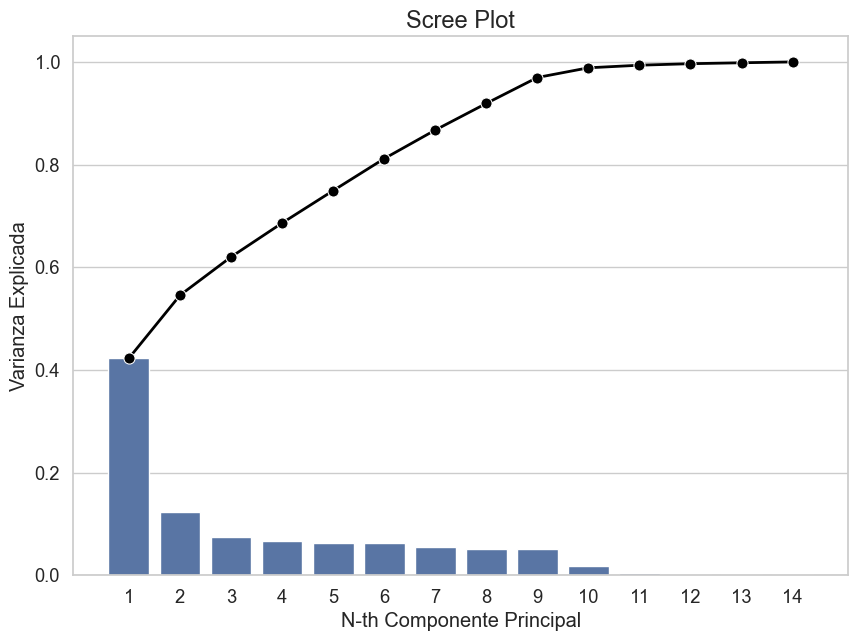

In [23]:
# Importamos MatplotLib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Generamos un arreglo con el numero de los componentes
pc_components = np.arange(pcs.n_components_) + 1

# El Acumulado del radio de la varianza en pcs
cusm = np.cumsum(pcs.explained_variance_ratio_)

# La variancia por cada componente principal
vartio = pcs.explained_variance_ratio_

scree = sns.set(style = 'whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize = (10, 7))
scree = sns.barplot(x = pc_components, y = vartio, color='b')
scree = sns.lineplot(x = pc_components - 1,
                    y = cusm,
                    color = 'black',
                    linestyle = '-',
                    linewidth = 2,
                    marker = 'o',
                    markersize = 8)
scree.set_title('Scree Plot', fontsize = 17)
scree.set(xlabel='N-th Componente Principal', ylabel='Varianza Explicada')

A continuacion haremos una comparacion con las variables originales escaladas para ver cuantas necesitariamos para explicar el 91% de la varianza a comparacion de las 8 que se necesitan para explicar el mismo porcentaje con los componentes de PCA

In [24]:
total_var = scaleddf.var().sum()

pd.DataFrame({
    "Porcentaje Varianza": (scaleddf.var()/ total_var) * 100,
    "Porcentaje Varianza Acumulado": (scaleddf.var().cumsum() / total_var) * 100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Total_Credito,7.142857,7.142857
Edad,7.142857,14.285714
TRSep2005,7.142857,21.428571
TRAgo2005,7.142857,28.571429
TRJul2005,7.142857,35.714286
TRJun2005,7.142857,42.857143
TRMay2005,7.142857,50.000000
TRAbr2005,7.142857,57.142857
TPPSep2005,7.142857,64.285714
TPPAgo2005,7.142857,71.428571


Como podemos observar, necesitariamos utilizar 13 variables del conjunto original para explicar el mismo porcentaje de varianza de solo 8 componentes de PCS.
Por lo que podemos concluir que existe una reduccion de 5 atributos al usar PCA. Por lo que tambien podemos decir que se reduce alrededor del 30% de los atributos originales al usar solo 8 componentes para explicar este 92% de varianza.

A continuacion, procedemos a analizar los pesos de cada atributo en cada uno de los 8 componentes elegidos:

In [25]:
compsdf = pd.DataFrame(
    pcs.components_.round(2), # Traemos los pesos de cada uno de los componente
    columns = pcsdf.columns, 
    index = scaleddf.columns) #Nombramos las filas como las columnas para una mejor visualizacion

# Traemos los primeros 8 componentes solamente.
compsdf.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Total_Credito,0.17,0.03,0.37,0.38,0.39,0.39,0.39,0.38
Edad,0.30,0.07,-0.19,-0.17,-0.13,-0.12,-0.11,-0.09
TRSep2005,-0.38,-0.87,-0.03,-0.00,0.03,0.03,0.03,0.02
TRAgo2005,-0.20,0.34,-0.06,0.01,0.06,0.07,0.04,-0.07
TRJul2005,0.03,-0.04,0.04,0.08,0.11,0.03,-0.11,-0.16
TRJun2005,-0.08,0.07,-0.04,-0.03,0.10,0.01,-0.10,0.07
TRMay2005,0.11,-0.08,0.01,-0.03,-0.12,0.13,-0.01,0.01
TRAbr2005,-0.05,0.03,0.01,-0.14,0.09,0.04,0.05,0.00
TPPSep2005,-0.82,0.33,0.01,0.02,-0.02,0.02,0.02,0.06
TPPAgo2005,-0.03,-0.01,0.57,0.39,0.12,-0.21,-0.42,-0.49


De esta tabla podemos observar como cada variable original contribute al peso de cada componente 

Nota: Nos interesa el peso en valor absoluto por lo que a continuacion mostramos los maximos de cada componente por filas.

In [26]:
# Usamos idxmax para obtener el maximo valor por fila.
# Usamos abs para que sea el valor absoluto
compsdf.iloc[:,:8].abs().idxmax() 

PC1    TPPSep2005
PC2     TRSep2005
PC3    TPPAgo2005
PC4    TPPAbr2005
PC5    TPPAbr2005
PC6    TPPJul2005
PC7    TPPMay2005
PC8    TPPJul2005
dtype: object

### Conclusión Paso 2:
Como podemos observar, despues de obtener los maximos pesos en valor absoluto, observamos que solo uno del Total del Recibo, es un atributo mayor en el componente 2. El resto de los componentes, tienen un Total de pagos pasados como su maximo peso. Esto nos indica que si bien estos datos no estan correlacionados si influyen en el modelo final.

## PASO 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

Decidimos realizar un boxplot para mostrar los valores atipicos de nuestro conjunto de datos ya escalados.

In [27]:
outliersdf = scaleddf.copy()
outliersdf.head()


,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005
0,-1.136720,-1.245959,-0.642559,-0.647432,-0.668013,-0.672519,-0.663090,-0.652775,-0.341871,-0.227093,-0.296760,-0.308063,-0.314119,-0.293390
1,-0.365981,-1.028971,-0.659277,-0.666780,-0.639274,-0.621656,-0.606259,-0.598016,-0.341871,-0.213595,-0.239960,-0.244229,-0.314119,-0.180886
2,-0.597202,-0.161019,-0.298608,-0.493929,-0.482425,-0.449748,-0.417210,-0.391674,-0.250214,-0.191894,-0.239960,-0.244229,-0.248665,-0.012130
3,-0.905498,0.164462,-0.057533,-0.013313,0.032840,-0.232386,-0.186744,-0.156618,-0.221111,-0.169368,-0.228600,-0.237846,-0.244149,-0.237138
4,-0.905498,2.334341,-0.578674,-0.611350,-0.161199,-0.347013,-0.348158,-0.331525,-0.221111,1.335031,0.271233,0.266439,-0.269021,-0.255195


Despues, decidimos aplicar un MinMaxScaler para poder tener una mejor visualizacion del grafico. 
Este escaler lo que nos permite transformar nuestros valores a un rango determinado (Default 0 a 1). 
Los valores que se encuentran en nuestro outliersDF van de -9 hasta arriba de 70 por lo que una transformacion de 0 a 1 ayuda a reducir la escala que se va a graficar.

Si bien los valores no seran los mismos, la escala si lo es con lo que podemos identificar los valores atipicos.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit_transform(outliersdf)

outliersdf = pd.DataFrame(scaler, columns=outliersdf.columns)
outliersdf.head()

,Total_Credito,Edad,TRSep2005,TRAgo2005,TRJul2005,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


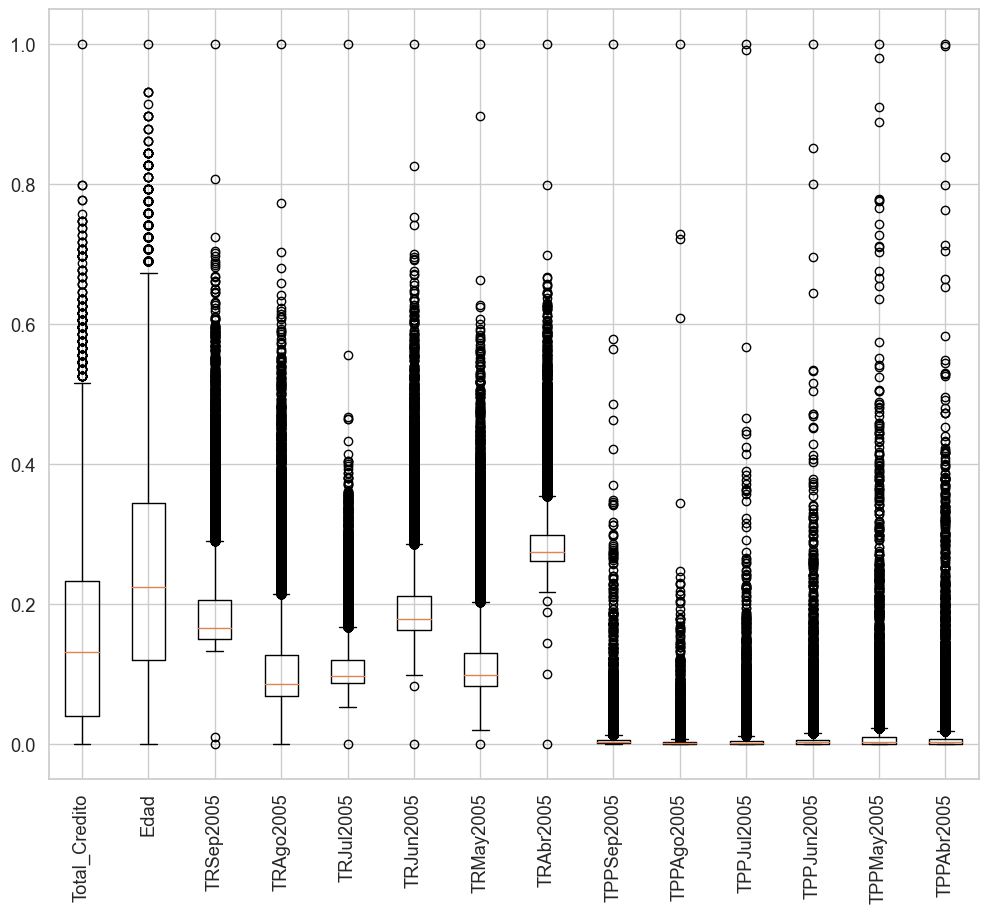

In [63]:
fig = plt.figure(figsize=(12,10))

plt.boxplot(outliersdf)
locs, labels = plt.xticks() 
plt.xticks(locs, outliersdf.columns, rotation='vertical')
plt.show()

### CONCLUSIÓN PASO 3
Despues de analizar la grafica anterior, es claro que necesitamos una estrategia para manejar los valores atipicos. Ests valores estan afectando a la varianza. Como se ve en la grafica, los totales de recibo y pagos pasados tienen una gran cantidad de valores fuera de lo normal, es de aqui donde podemos identificar porque son estos valores los que estan causando la mayor varianza

# PARTE 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

## ¿Cuál es el número de componentes mínimo y por qué?

Para nosotros el numero de componentes minimo es de 8. Esto debido a que con estos 8 componentes podemos explicar un 92% de varianza de nuestro conjunto de datos. Si bien con un numero menor como 6 nos encontrariamos en 81%, estos 2 valores adicionales estan altamente relacionados con los otros ya que son datos de transacciones de meses diferentes, es por eso que creemos que al elegir 8 componentes estamos aplicando un buen analisis de componentes principales.

## ¿Cuál es la variación de los datos que representan esos componentes?

Estos 8 componentes que elegimos representan el 92% de la varianza total de datos. Lo que nos brinda una buena perspectiva de como se distribuyen los datos en nuestro conjunto original

## ¿Cuál es la pérdida de información después de realizar PCA?

La perdida de informacion seria de alrededor de 8% para nuestro conuunto de datos, lo cual no parece ser un gran numero. Sin embargo hay q tomar en cuenta los resultados obtenidos en el paso 3 de la parte 1 donde detectamos una gran cantidad de valores atipicos, los cuales necesitan ser atendidos de alguna manera con el fin de generar el mejor modelo posible.

## De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

El mayor porcentaje de peso en los componentes es para la variable TRSep2005 con un 87% en PC2, seguida por TPPSep2005 con un 82% en PC1. Por lo que se observa en nuestro analisis, las variables de Total de pagos pasados tienen un mayor peso en los componentes aunque estas a su vez cuentan con la mayor cantidad de valores atipicos por lo que necesitariamos realizar mas transformaciones y validaciones para verificar nuestro modelo.

## ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Un PCA se utiliza para reducir el numero de variables o factores de un conjunto de datos para poder facilitar su analisis. Esto debido a que existen relaciones entre las diferentes atributos. Nosotros pudimos identificar 2 escenarios donde se recomienda usar esta tecnica:

- Cuando la cantidad de atributos a analizar es demasiado alta. Esto porque se requiere de una manera eficiente y mas facil de procesar los datos para generar un modelo. Ademas de que es posible que las relaciones entre tantas variables sean estrechas.
- Cuando tenemos variables altamente correlacionadas: Este caso es cuando en un conjunto de datos, como el del ejemplo, contamos con variables que dependen o estan correlacionadas unas con las otras. Si al aumentar la magnitud de la variable X la variable Y Incrementa o decrese a la par entonces estas variables estan correlacionadas.